# Context
Game of Thrones is a hit fantasy tv show based on the equally famous book series "A Song of Fire and Ice" by George RR Martin. The show is well known for its vastly complicated political landscape, large number of characters, and its frequent character deaths.

# Content
This dataset combines three sources of data, all of which are based on information from the book series.

Firstly, there is battles.csv which contains Chris Albon's "The
War of the Five Kings" Dataset. Its a
great collection of all of the battles in the series.

Secondly we have character-deaths.csv from Erin Pierce and Ben
Kahle. This dataset was created as a part of their Bayesian Survival
Analysis.

Finally we have a more comprehensive character dataset with
character-predictions.csv. It
includes their predictions on which character will die

# Load Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import scale
from scipy import stats
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [97]:
bdf=pd.read_csv('../input/game-of-thrones/battles.csv')
cddf=pd.read_csv('../input/game-of-thrones/character-deaths.csv')

# Read the Data And Sneeking Variables

In [98]:
print('The no of columns and rows in battle csv :',bdf.shape)
print('The no of columns and rows in character csv :',cddf.shape)

The no of columns and rows in battle csv : (38, 25)
The no of columns and rows in character csv : (917, 13)


In [99]:
print('Name of the columns in battle dataset: ', bdf.columns)
print('Name of the columns in charecter data set :', cddf.columns)

Name of the columns in battle dataset:  Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')
Name of the columns in charecter data set : Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')


# now doing EDA on Battels

In [100]:
print('sneeking the 1st five rows of battels data :')
bdf.head()

sneeking the 1st five rows of battels data :


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [101]:
print('sneeking the last five rows of battels data :')
bdf.tail()

sneeking the last five rows of battels data :


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,...,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,...,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,...,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [102]:
print('finding the datatype and non- null count of each row: ')
bdf.info()

finding the datatype and non- null count of each row: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  majo

In [103]:
#here we can see that total no of numerical columns are 9 and object columns 16

In [104]:
print('lets observed the no of battels along with name :')
pd.melt(frame=bdf, id_vars="year",value_vars="name")

lets observed the no of battels along with name :


,year,variable,value
0,298,name,Battle of the Golden Tooth
1,298,name,Battle at the Mummer's Ford
2,298,name,Battle of Riverrun
3,298,name,Battle of the Green Fork
4,298,name,Battle of the Whispering Wood
5,298,name,Battle of the Camps
6,298,name,Sack of Darry
7,299,name,Battle of Moat Cailin
8,299,name,Battle of Deepwood Motte
9,299,name,Battle of the Stony Shore


#Here we can observed that there are around 38 battels fought and time line is varied from 298 to 300.

# visualion with step by step analysis

Correlations
Let's take a look at how everything is correlated within their datasets, and how they are correlated to each other. A positive number indicates that as x increases, so does y. A negative number indicates that as x increases, y decreases.

In [105]:
bdf.corr().style.background_gradient(cmap='Reds')

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.906781,nan,nan,-0.341050,-0.166234,0.155841,-0.366048,-0.841912
battle_number,0.906781,1.000000,nan,nan,-0.270421,-0.105225,0.086418,-0.297730,-0.799090
defender_3,nan,nan,nan,nan,nan,nan,nan,nan,nan
defender_4,nan,nan,nan,nan,nan,nan,nan,nan,nan
major_death,-0.341050,-0.270421,nan,nan,1.000000,0.264464,0.267966,0.081815,0.337136
major_capture,-0.166234,-0.105225,nan,nan,0.264464,1.000000,0.331961,0.249510,0.142112
attacker_size,0.155841,0.086418,nan,nan,0.267966,0.331961,1.000000,-0.112118,-0.273054
defender_size,-0.366048,-0.297730,nan,nan,0.081815,0.249510,-0.112118,1.000000,0.347108
summer,-0.841912,-0.799090,nan,nan,0.337136,0.142112,-0.273054,0.347108,1.000000


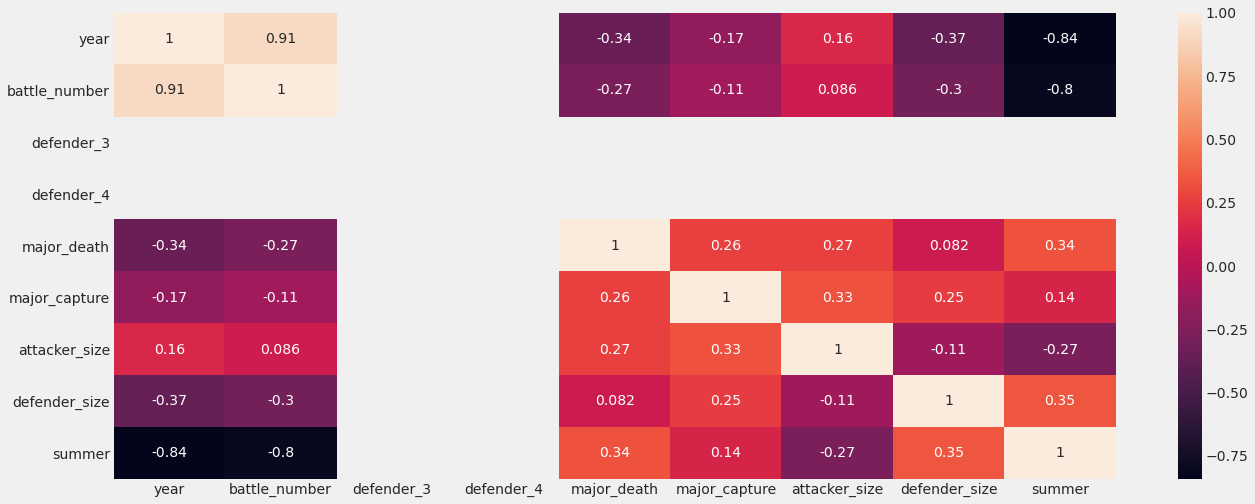

In [106]:
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(bdf.corr(),annot=True);

count of battels per year

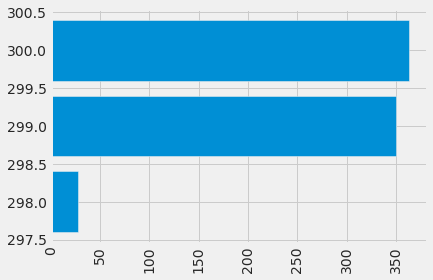

In [107]:
bpy=bdf.groupby('year',as_index=False).sum()
plt.barh(bpy['year'],bpy['battle_number'])
plt.xticks(rotation=90);

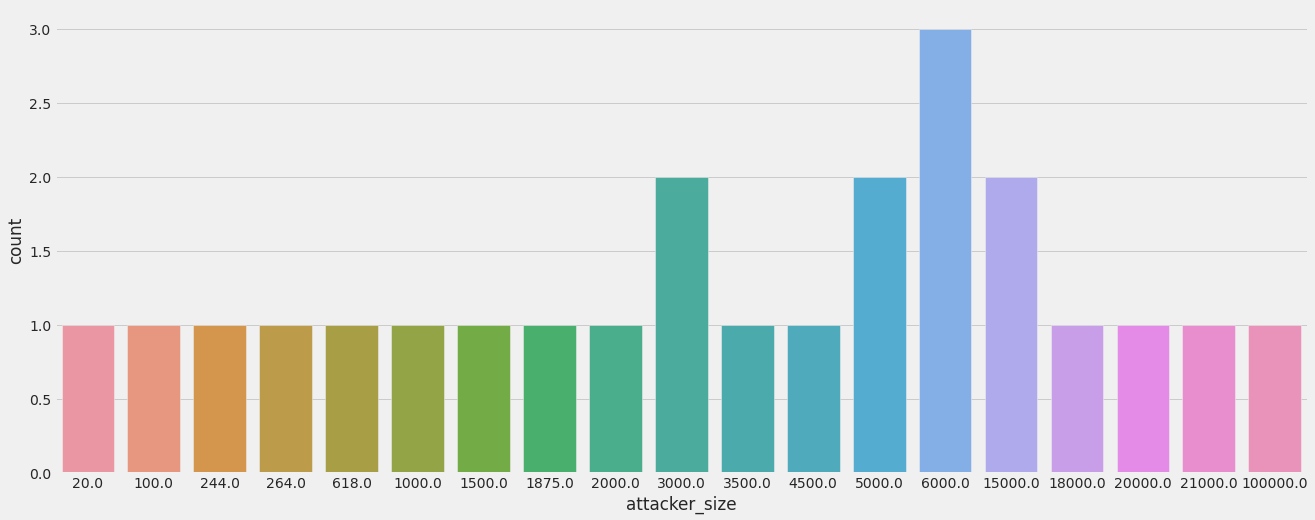

In [108]:
#attacker size count..
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_size']);

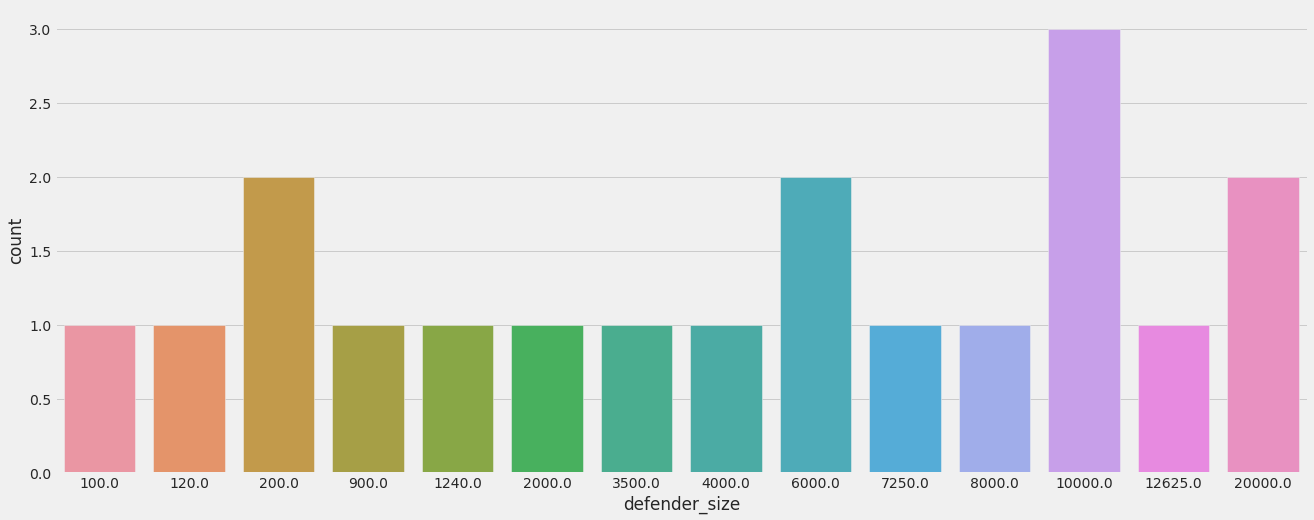

In [109]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['defender_size']);

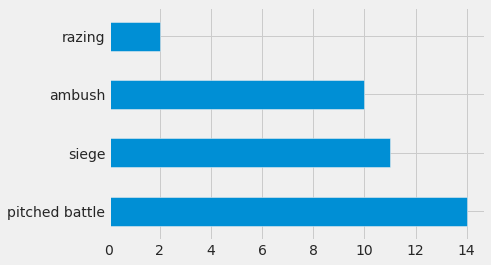

In [110]:
bdf['battle_type'].value_counts().plot(kind = 'barh');

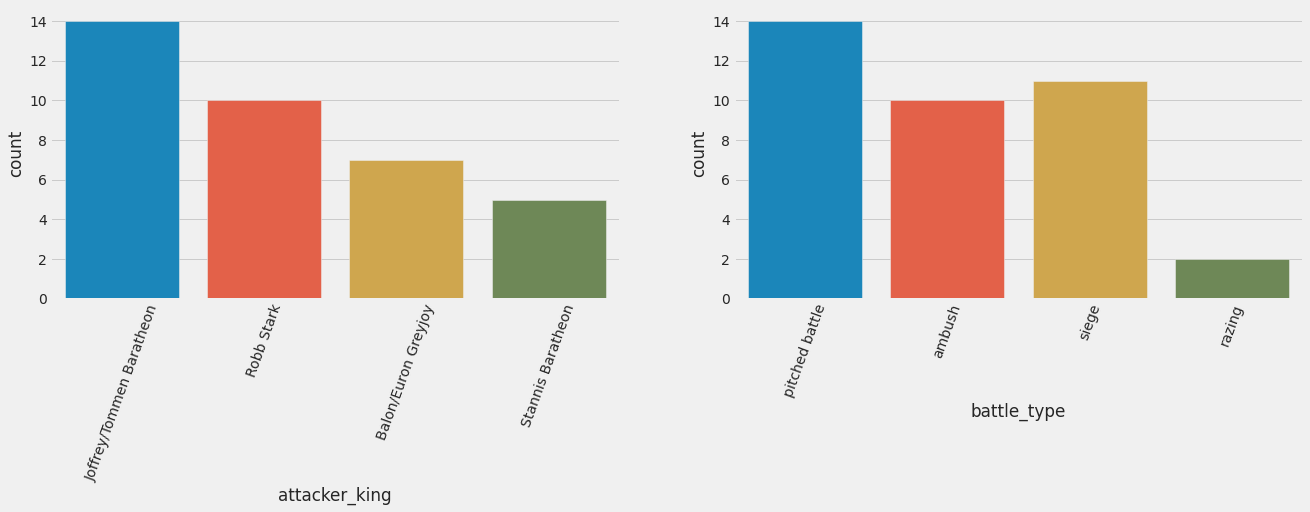

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(bdf['attacker_king'])
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.countplot(bdf['battle_type']);
plt.xticks(rotation=70);

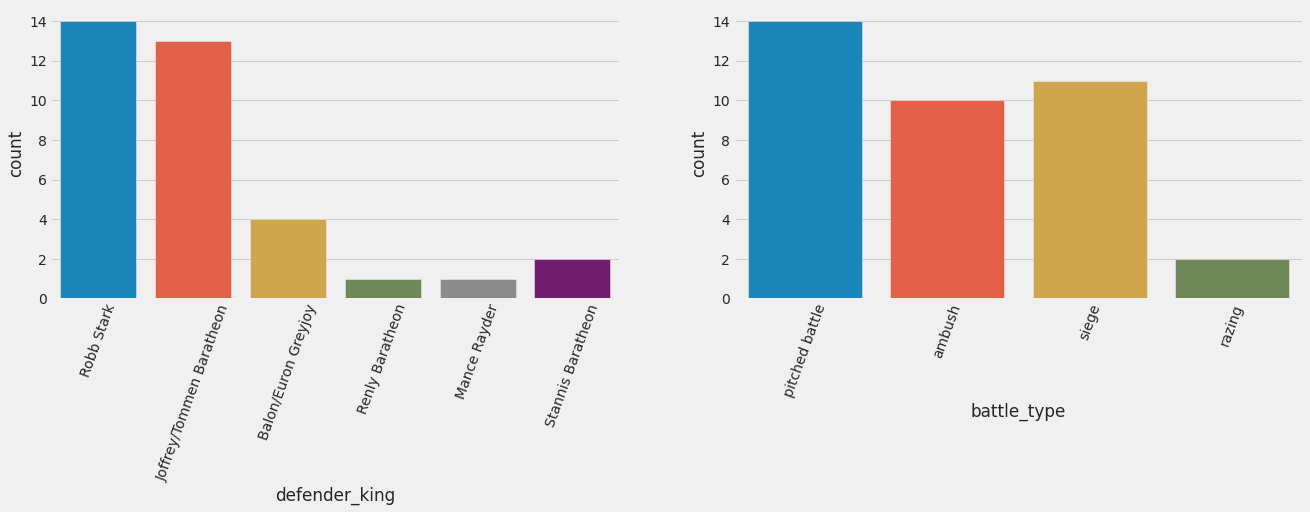

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(bdf['defender_king'])
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.countplot(bdf['battle_type']);
plt.xticks(rotation=70);

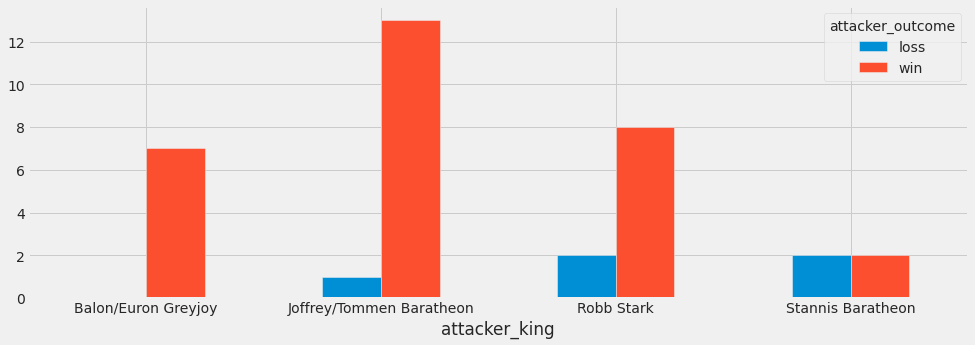

In [113]:
pd.crosstab(bdf['attacker_king'],bdf['attacker_outcome']).plot(kind='bar',figsize=(15,5));
plt.xticks(rotation='horizontal');

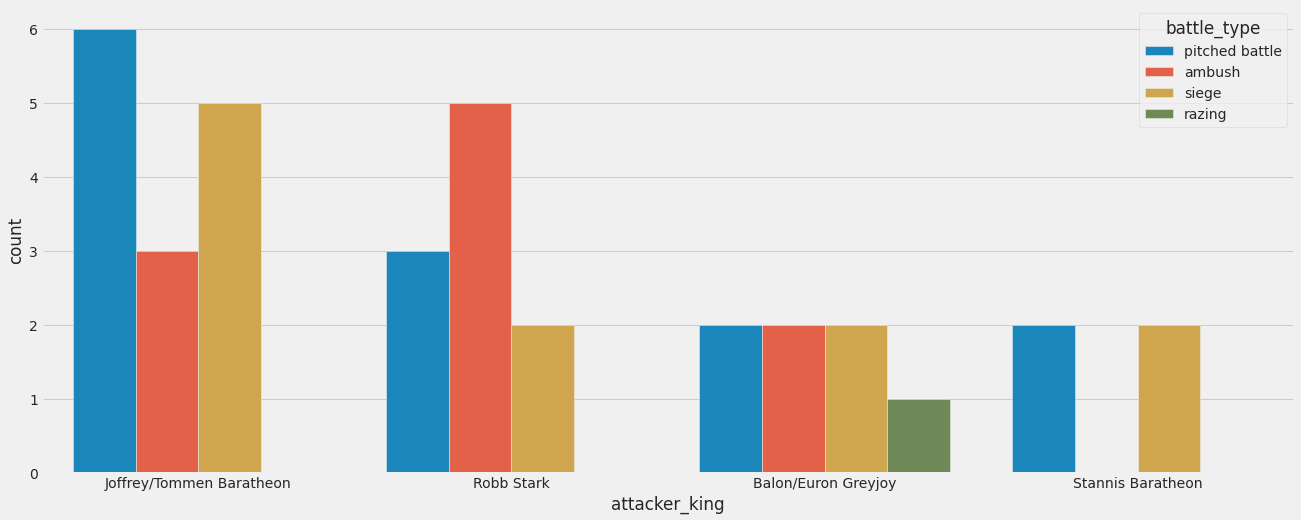

In [114]:
#find attacjer king and battles type
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['battle_type']);

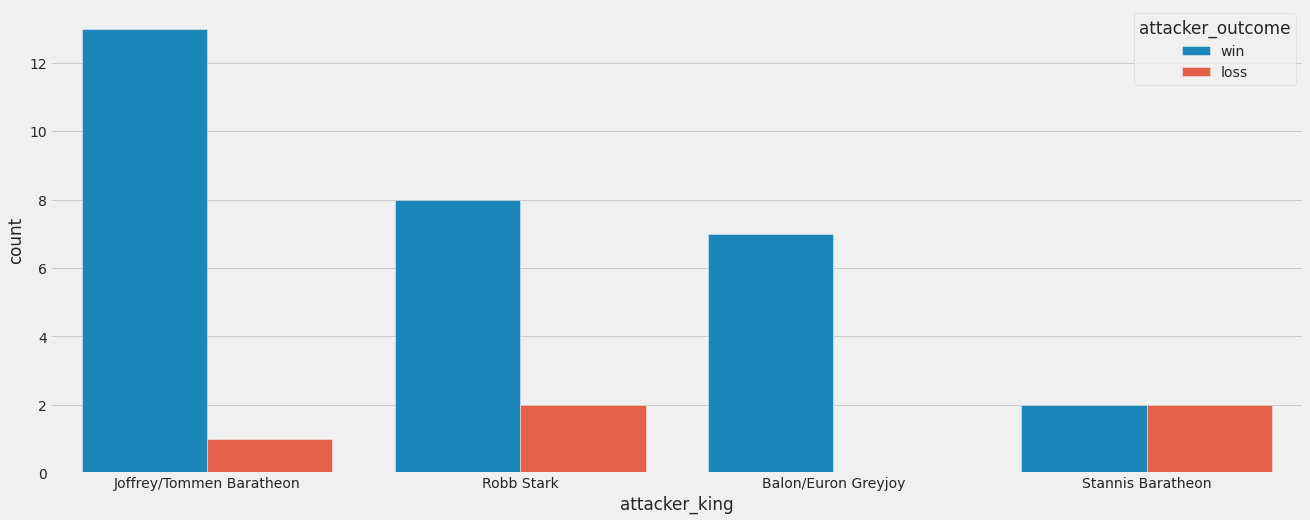

In [115]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['attacker_outcome']);

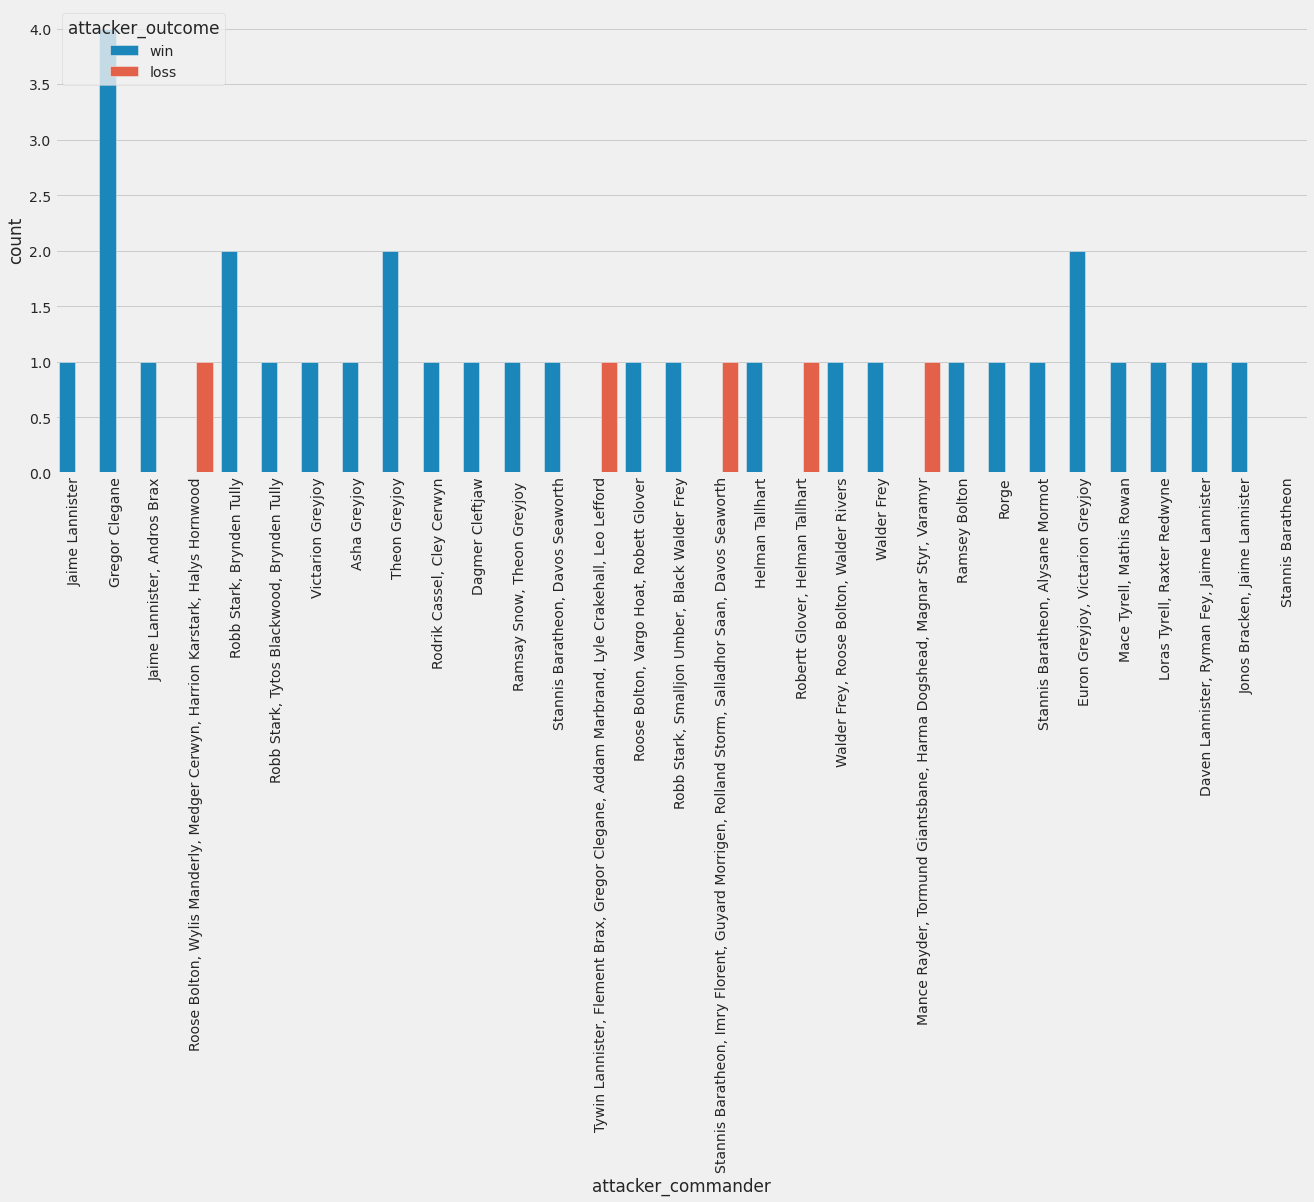

In [116]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_commander'],hue=bdf['attacker_outcome']);
plt.xticks(rotation=90);

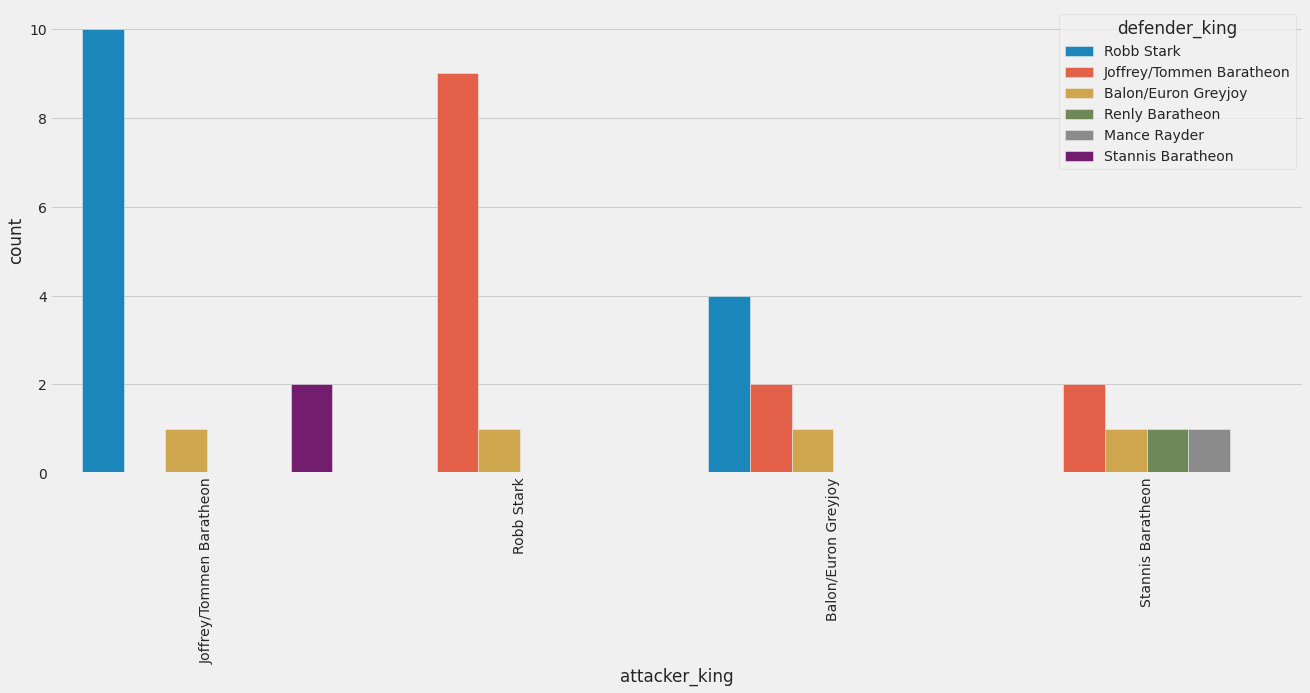

In [117]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['defender_king']);
plt.xticks(rotation=90);

In [118]:
bdf.loc[:, "totaldefender"] = (4 - bdf[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
bdf.loc[:, "totalattacker"] = (4 - bdf[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
bdf.loc[:, "totalcommon"] = [len(x) if type(x) == list else np.nan for x in bdf.attacker_commander.str.split(",")]

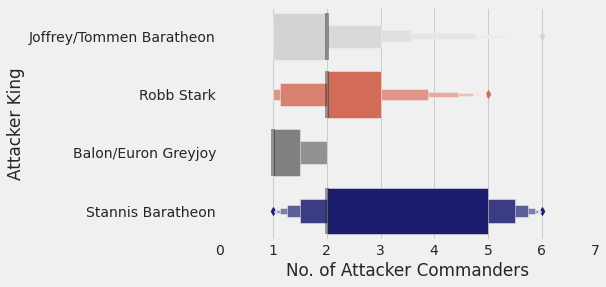

In [119]:
p = sns.boxenplot("totalcommon", "attacker_king", data = bdf, saturation = .6,palette = ["lightgray", sns.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "No. of Attacker Commanders", ylabel = "Attacker King", xticks = range(8))

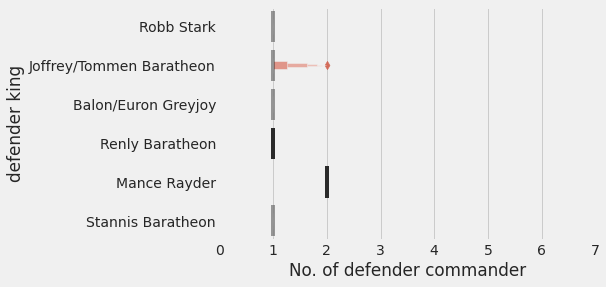

In [120]:
p = sns.boxenplot("totaldefender", "defender_king", data = bdf, saturation = .6,palette = ["lightgray", sns.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "No. of defender commander", ylabel = "defender king", xticks = range(8))

In [121]:
bdf['attacker_size'].mean()

9942.541666666666

In [122]:
bdf['defender_size'].mean()

6428.1578947368425

In [123]:
nbdf = bdf[['defender_size','attacker_size','attacker_outcome']].dropna()

In [124]:
nbdf.reset_index(inplace=True)

In [125]:
nbdf = nbdf.iloc[:,1:]

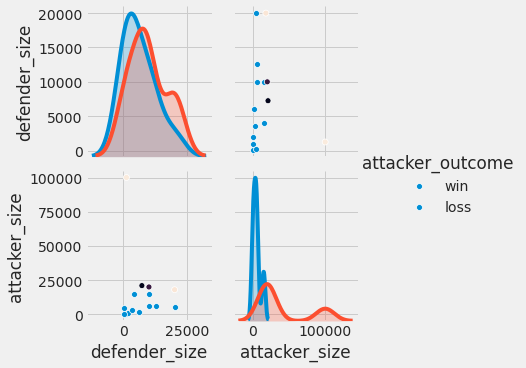

In [126]:
sns.pairplot(nbdf, hue='attacker_outcome');

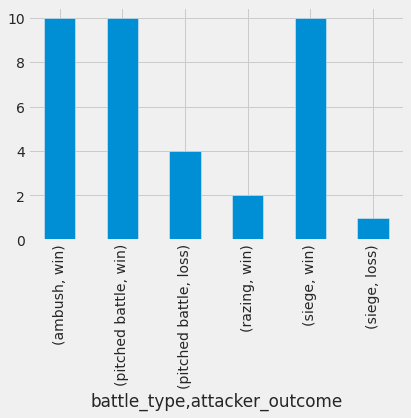

In [127]:
bdf.groupby('battle_type')['attacker_outcome'].value_counts().plot(kind = 'bar');

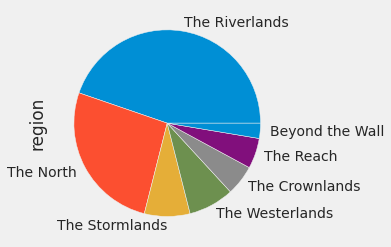

In [128]:
bdf['region'].value_counts().plot(kind = 'pie');

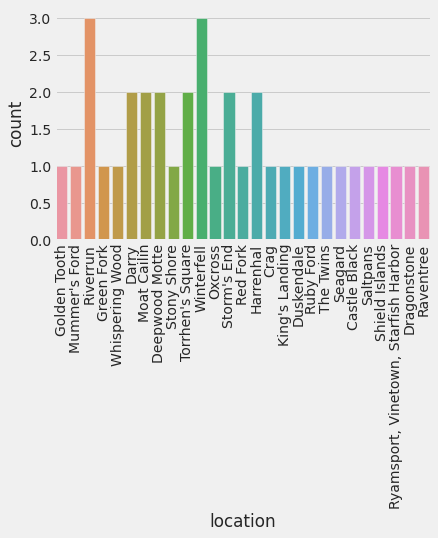

In [129]:
sns.countplot(x=bdf['location'])
plt.xticks(rotation=90);

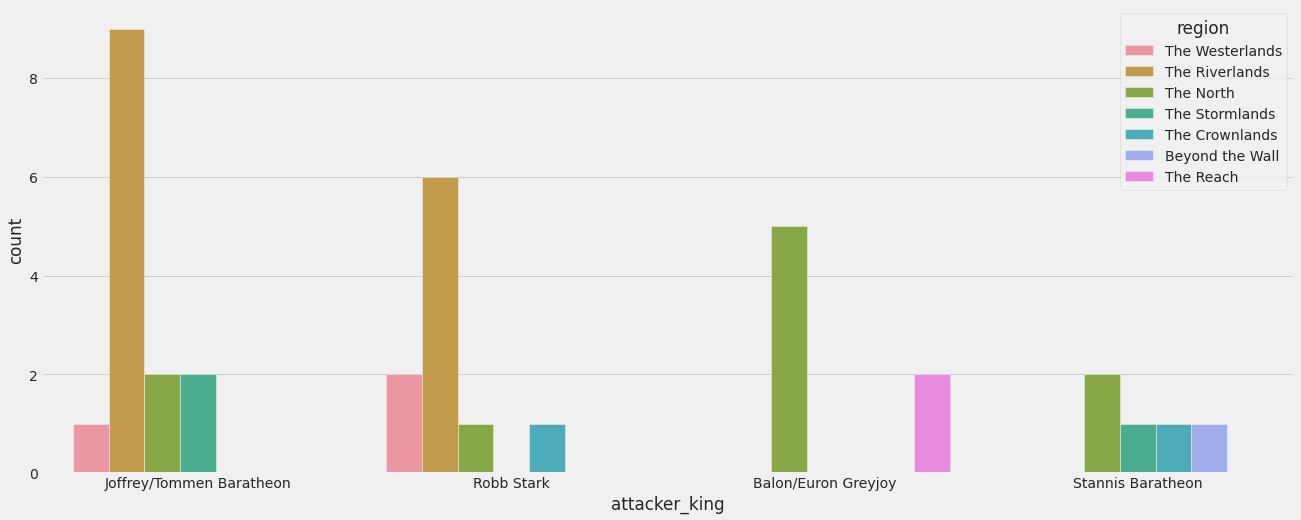

In [130]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['region']);

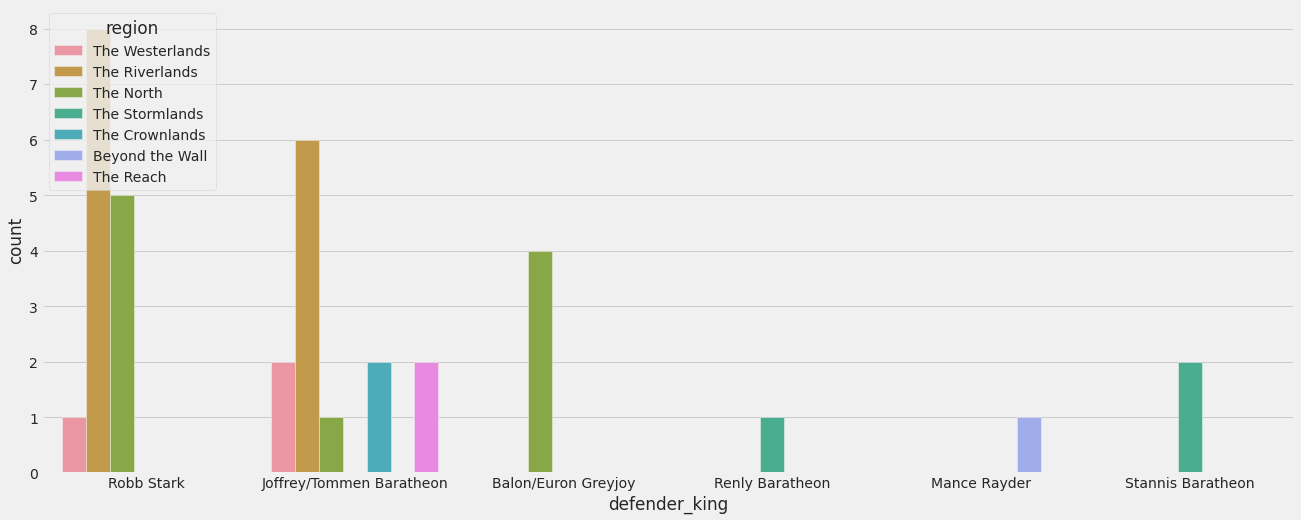

In [131]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['defender_king'],hue=bdf['region']);

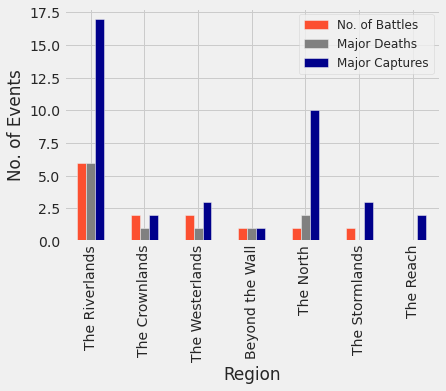

In [132]:
data = bdf.groupby("region").sum()[["major_death", "major_capture"]]
p = pd.concat([data, bdf.region.value_counts().to_frame()], axis = 1).sort_values("major_death", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], 
"grey", "darkblue"], rot = 0)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["No. of Battles", "Major Deaths", "Major Captures"], fontsize = 12.)
plt.xticks(rotation=90);

charecter deth analysis.

In [133]:
cddf['Allegiances'] = cddf['Allegiances'].apply(lambda x : 'House Martell' if(x == 'Martell') else 'House Stark' if(x=='Stark') else 'House Targaryen' if(x=='Targaryen') else 'House Tully' if(x=='Tully') else 'House Tyrell' if(x=='Tyrell') else x)

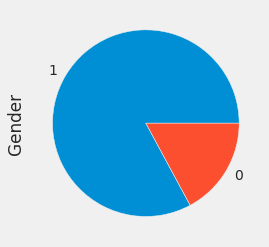

In [134]:
cddf['Gender'].value_counts().plot(kind = 'pie');

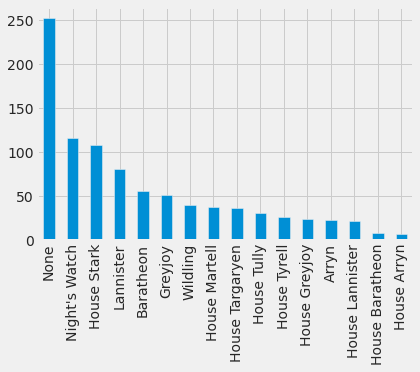

In [135]:
cddf['Allegiances'].value_counts().plot(kind = 'bar', stacked='True');

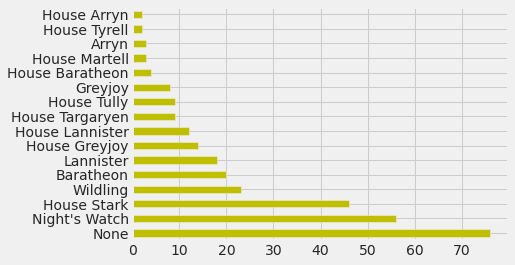

In [136]:
cddf[cddf['Death Year'].notnull()]['Allegiances'].value_counts().plot(kind = 'barh',color='y');

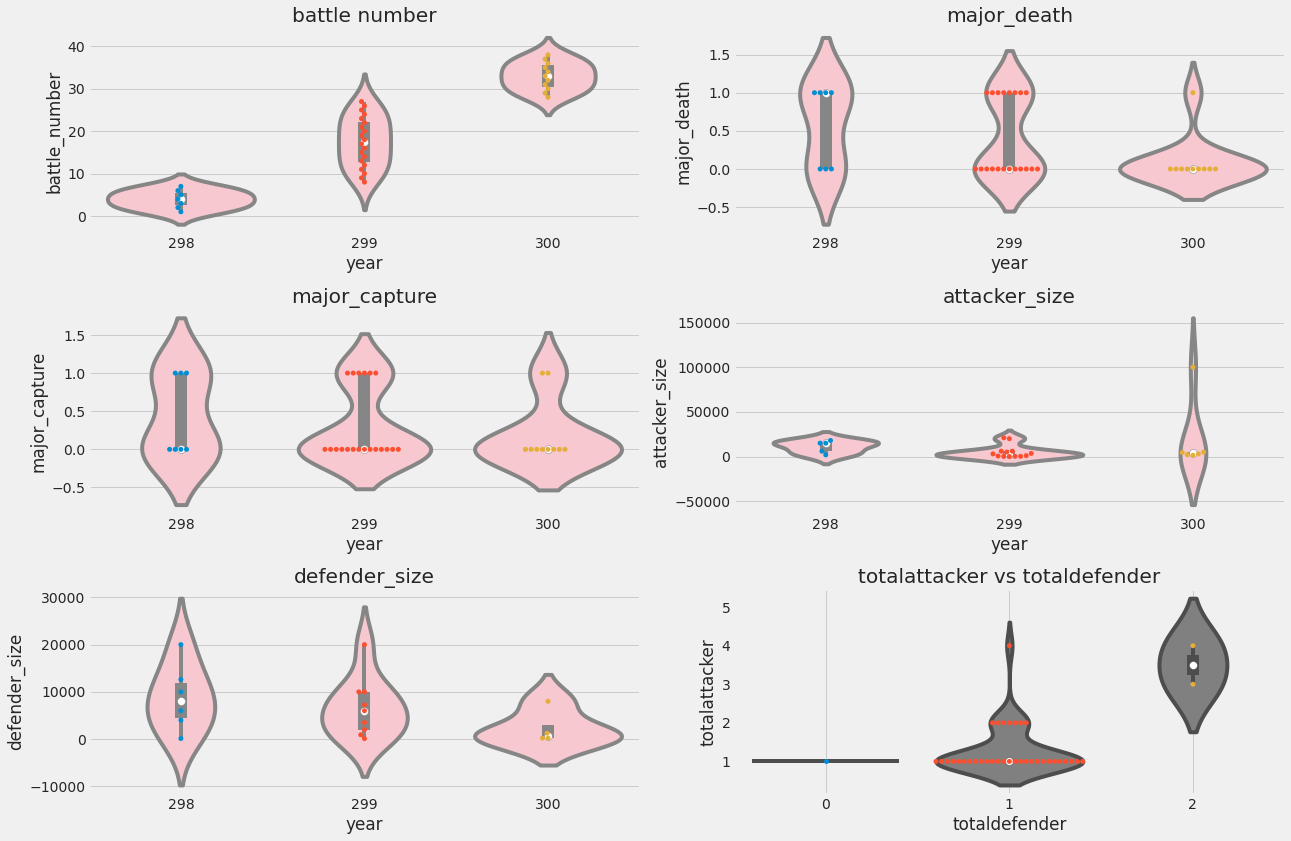

In [137]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
sns.violinplot(x="year", y="battle_number", data=bdf,color = 'pink',ax=axes[0][0]).set_title('battle number')
sns.swarmplot(x="year", y="battle_number", data=bdf,ax = axes[0][0])

sns.violinplot(x="year", y="major_death", data=bdf,color = 'pink',ax=axes[0][1]).set_title('major_death')
sns.swarmplot(x="year", y="major_death", data=bdf,ax = axes[0][1])

sns.violinplot(x="year", y="major_capture", data=bdf,color = 'pink',ax=axes[1][0]).set_title('major_capture')
sns.swarmplot(x="year", y="major_capture", data=bdf,ax = axes[1][0])

sns.violinplot(x="year", y="attacker_size", data=bdf,color = 'pink',ax=axes[1][1]).set_title('attacker_size')
sns.swarmplot(x="year", y="attacker_size", data=bdf,ax = axes[1][1])

sns.violinplot(x="year", y="defender_size", data=bdf,color = 'pink',ax=axes[2][0]).set_title('defender_size')
sns.swarmplot(x="year", y="defender_size", data=bdf,ax = axes[2][0])

sns.violinplot(x="totaldefender", y="totalattacker", data=bdf,color = 'gray',ax=axes[2][1]).set_title('totalattacker vs totaldefender')
sns.swarmplot(x="totaldefender", y="totalattacker", data=bdf,ax = axes[2][1])

plt.grid()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


# conclusion
if this visualization is helpfull kindly upvote!!! :) 